#Student Name: Cormac Lavery
#Student ID: 16139658

Experiment summary:
A chicken coops lays between 1 and 6 eggs a day, Farmer brown has 6 coops. The local co-op will only accept consignments of 1000 eggs at a time, on average how may days will it take farmer brown to fill the consignment? What is the least number of coops that farmer brown will need to on average be able to fill a consigment daily


In [2]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
def lay_eggs(n_coops, lower_bound, upper_bound):
    '''returns the sum of n_coops with each coops laying between a lower and upper bound'''
    egg_count = 0
    for i in range(n_coops):
        eggs = random.randint(lower_bound, upper_bound)
        egg_count += eggs
    return egg_count

number_of_observations_experiment_1 = 10000
observations_experiment_1 = []

#check how many days it takes farmer brown to fill a consigment

for _ in range(number_of_observations_experiment_1):
    egg_count = 0
    day_count = 0
    while(egg_count < 1000):
        egg_count += lay_eggs(6, 1, 6)
        day_count += 1
    observations_experiment_1.append(day_count)
    
#check what percentage of the time farmer brown will be able to fill a consigment with x number of coops
#minimum amount to get 1000 in a day is equal to 1000/6 = 167 max_number = 1000/1 = 1000

number_of_observations_experiment_2 = 10000

observations_experiment_2 = []
for coop_count in range(167, 350):
    count_sucessfull = 0
    observations = []
    for _ in range(number_of_observations_experiment_2):
        egg_count = lay_eggs(coop_count, 1, 6)
        observations.append(egg_count)
        if egg_count > 1000:
            count_sucessfull += 1
    observations_experiment_2.append((coop_count, count_sucessfull / number_of_observations_experiment_2, observations))


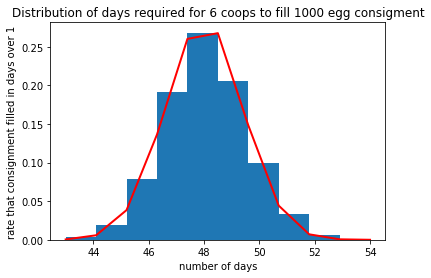

the median number of days to produce 1000 eggs was 48.0 with standard_deviation 1.3984831461265452 and average of 48.1317


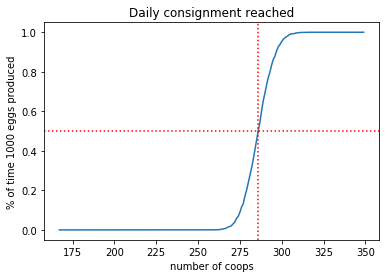

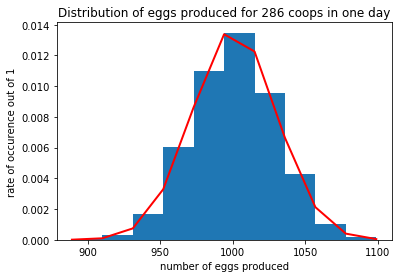

the lowest number of coops required to on average provide 1000 eggs daily is 286
the median number of eggs produced was 1001.0 with standard_deviation of 28.949946430174958 and average of 1000.4987


In [4]:
standard_deviation = np.std(observations_experiment_1)
median_number_of_days = np.median(observations_experiment_1)
average_number_of_days = np.average(observations_experiment_1)

#histogram normal overlay from sample on https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

_, bins, _ = plt.hist(observations_experiment_1, 10, density=True)
plt.plot(bins, 1/(standard_deviation * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - median_number_of_days)**2 / (2 * standard_deviation**2) ),
         linewidth=2, color='r')
plt.title("Distribution of days required for 6 coops to fill 1000 egg consigment")
plt.xlabel("number of days")
plt.ylabel("rate that consignment filled in days over 1")
plt.show()

print("the median number of days to produce 1000 eggs was {} with standard_deviation {} and average of {}".format(str(median_number_of_days), str(standard_deviation), str(average_number_of_days)))

coop_count, results, observations = zip(*observations_experiment_2)
lowest_viable_coop_count = None
for observation in observations_experiment_2:
    if(observation[1] >= .5):
        lowest_viable_coop_count = observation
        break

standard_deviation_2 = np.std(lowest_viable_coop_count[2])
median_number_of_eggs = np.median(lowest_viable_coop_count[2])
average_number_of_eggs = np.average(lowest_viable_coop_count[2])

plt.plot(coop_count, results)
plt.title("Daily consignment reached")
plt.xlabel("number of coops")
plt.ylabel("% of time 1000 eggs produced")
plt.axhline(y=0.5, color='r', linestyle='dotted')
plt.axvline(x=lowest_viable_coop_count[0], color='r', linestyle='dotted')
plt.show()

_, bins, _ = plt.hist(lowest_viable_coop_count[2], 10, density=True)
plt.plot(bins, 1/(standard_deviation_2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - median_number_of_eggs)**2 / (2 * standard_deviation_2**2) ),
         linewidth=2, color='r')
plt.title("Distribution of eggs produced for {} coops in one day".format(lowest_viable_coop_count[0]))
plt.xlabel("number of eggs produced")
plt.ylabel("rate of occurence out of 1")
plt.show()

print("the lowest number of coops required to on average provide 1000 eggs daily is {}".format(lowest_viable_coop_count[0]))
print("the median number of eggs produced was {} with standard_deviation of {} and average of {}"
     .format(median_number_of_eggs, standard_deviation_2, average_number_of_eggs))